In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [3]:
#load the Data 
ccd = pd.read_csv('Credit_card_dataset.csv')

In [6]:
ccd.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [7]:
ccd.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [9]:
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [10]:
ccd.isna().mean()*100

CUST_ID              0.000000
BALANCE_FREQUENCY    0.000000
PURCHASES            0.000000
PAYMENTS             0.000000
CREDIT_LIMIT         0.011173
CASH_ADVANCE         0.000000
dtype: float64

In [12]:
ccd.columns

Index(['CUST_ID', 'BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT',
       'CASH_ADVANCE'],
      dtype='object')

In [13]:
ccd.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [14]:
ccd['CASH_ADVANCE'].fillna(ccd['CASH_ADVANCE'].median(), inplace=True)

In [15]:
# Drop columns that are not to be used
ccd.drop(['CUST_ID'], axis=1, inplace=True)
ccd.drop('BALANCE_FREQUENCY', axis=1, inplace=True)
ccd.drop('PAYMENTS', axis=1, inplace=True)
ccd.drop('CASH_ADVANCE', axis=1, inplace=True)

In [16]:
#remove outliers
from scipy import stats
ccd = ccd[(np.abs(stats.zscore(ccd['PURCHASES'])) < 3)]
ccd = ccd[(np.abs(stats.zscore(ccd['CREDIT_LIMIT'])) < 3)]

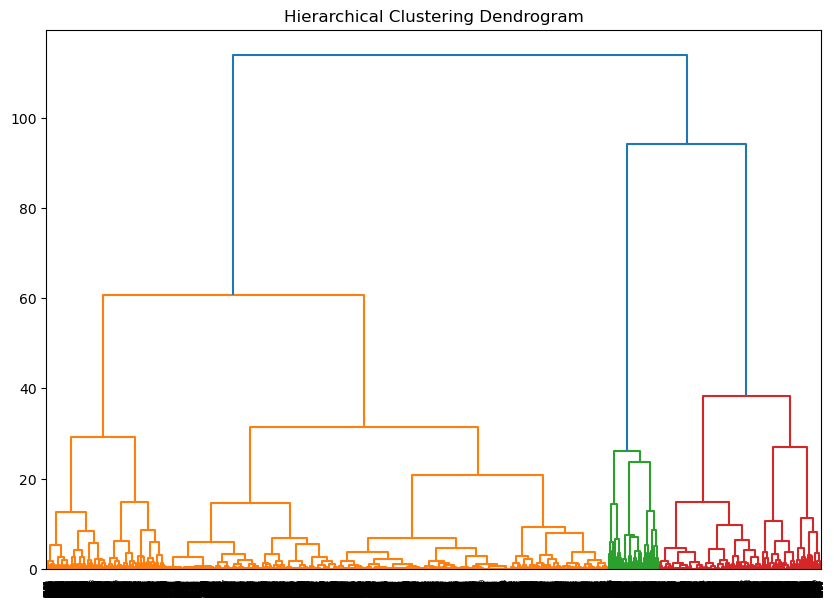

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
X = ccd[['PURCHASES', 'CREDIT_LIMIT']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [18]:
#Model Training

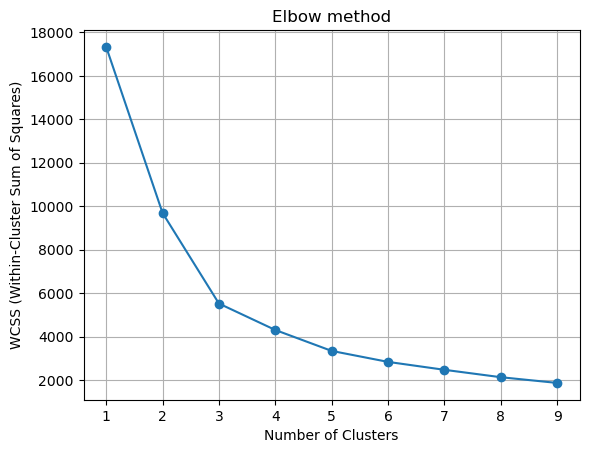

In [19]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your feature matrix
pca = PCA(n_components=2)  # You can change the number of components based on your use case
X_red = pca.fit_transform(X_scaled)

# Now apply KMeans clustering on the reduced dataset
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range(1, 10)]
inertia = [model.inertia_ for model in kmeans_models]


from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

# Plotting the elbow method graph
plt.plot(range(1, 10), innertia, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 10))  # Optional: sets x-ticks to integers
plt.grid()
plt.show()

In [29]:
model_3 = KMeans(n_clusters=3, random_state=23).fit(X_red)
model_3.inertia_

5527.029078580703

In [30]:
model_4 = KMeans(n_clusters=4, random_state=23).fit(X_red)
model_4.inertia_

4310.8335587478

In [32]:
model_5 = KMeans(n_clusters=5, random_state=23).fit(X_red)
model_5.inertia_

3348.3903247987023

In [34]:
model_6 = KMeans(n_clusters=6, random_state=23).fit(X_red)
model_6.inertia_

2843.452195653187

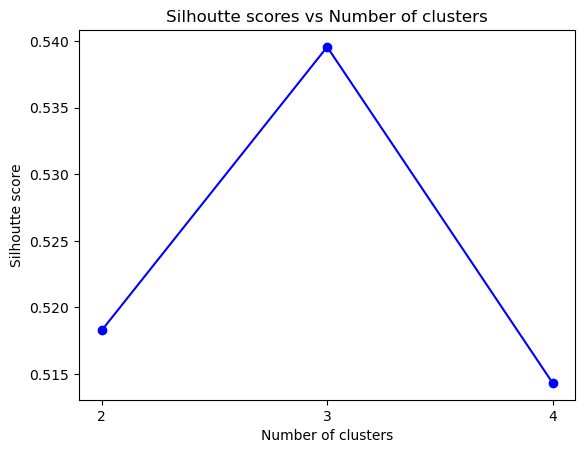

In [35]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

#select 2 as our number of clusters.

In [43]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))
#Silhoutte score of our model is 0.8700455999561516

Silhoutte score of our model is 0.47417752252573653


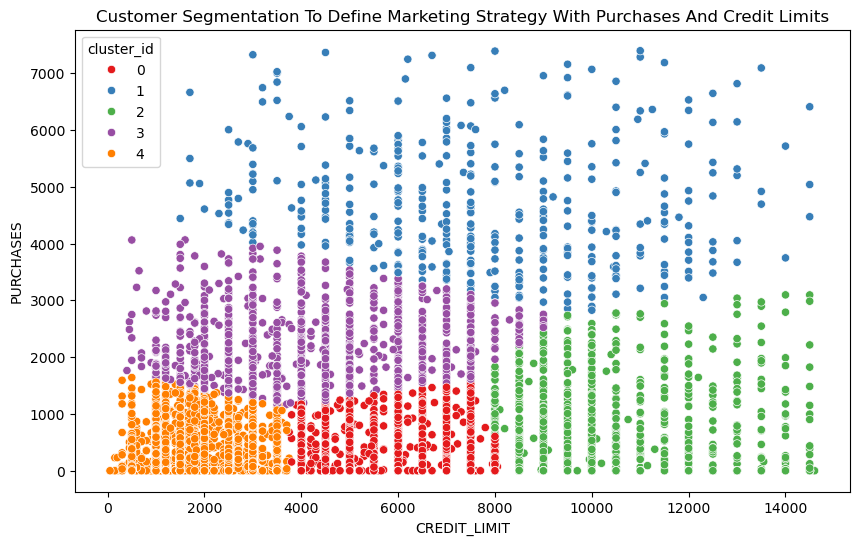

In [45]:
#Assigning labels as cluster index to our dataset.

ccd['cluster_id'] = kmeans.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x=ccd['CREDIT_LIMIT'], y=ccd['PURCHASES'], hue=ccd['cluster_id'], palette= 'Set1')
plt.title('Customer Segmentation To Define Marketing Strategy With Purchases And Credit Limits')
plt.show()

Looking at the 5 plots above  it seems like our model has clustered customers with low usage of credit card in one cluster and model with higher usage of clusters in other. 